<a href="https://colab.research.google.com/github/cyanmage/voxel51/blob/main/Copie_de_running_inference_on_a_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage.io as io
image_url = "https://raw.githubusercontent.com/andandandand/images-for-colab-notebooks/refs/heads/main/fresh_orange.jpeg"
image_url = "https://raw.githubusercontent.com/andandandand/images-for-colab-notebooks/refs/heads/main/fresh_apple.png"
image_array = io.imread(image_url)


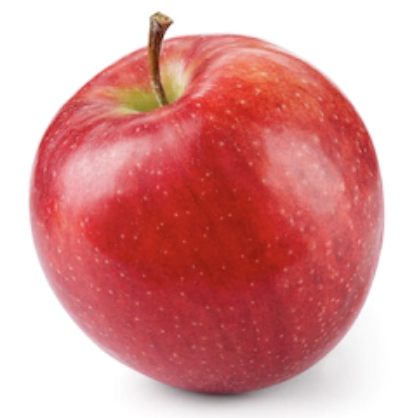

In [ ]:
from PIL import Image
# We need to save images to the local hard drive to use them later in FiftyOne
pil_image = Image.fromarray(image_array).convert("RGB")
pil_image.save("./fresh_apple.jpeg")
pil_image

In [ ]:
import torchvision.transforms.v2 as transforms

torch_tensor_image = transforms.ToImage()(pil_image) / 255.0
torch_tensor_image.shape

torch.Size([3, 418, 412])

In [ ]:
!ls

fresh_apple.jpeg  fresh_orange.jpeg  sample_data


In [ ]:
import torch
from torchvision.models import resnet18
from torchvision.models import vgg19

from torchvision.models import ResNet18_Weights
from torchvision.models import VGG19_Weights

In [ ]:
# The pretrained version of the network comes pretrained on the IMAGENET1K dataset
ResNet18_Weights.DEFAULT

ResNet18_Weights.IMAGENET1K_V1

In [ ]:
dir(ResNet18_Weights.DEFAULT)

['__class__',
 '__doc__',
 '__eq__',
 '__hash__',
 '__module__',
 'get_state_dict',
 'meta',
 'name',
 'transforms',
 'url',
 'value',
 'verify']

In [ ]:
original_transforms = ResNet18_Weights.DEFAULT.transforms()
original_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
my_resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
my_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Dictionary with ImageNet classes

In [ ]:
import requests

# The raw URL to the JSON file
url = "https://raw.githubusercontent.com/aihpi/practical-computer-vision-with-pytorch/refs/heads/main/artifacts/imagenet_classes.json"

# Fetch the file
response = requests.get(url)

# Load the JSON content into a dictionary
label_mapping = eval(response.text)

print(label_mapping)


{'0': 'tench, Tinca tinca', '1': 'goldfish, Carassius auratus', '2': 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', '3': 'tiger shark, Galeocerdo cuvieri', '4': 'hammerhead, hammerhead shark', '5': 'electric ray, crampfish, numbfish, torpedo', '6': 'stingray', '7': 'cock', '8': 'hen', '9': 'ostrich, Struthio camelus', '10': 'brambling, Fringilla montifringilla', '11': 'goldfinch, Carduelis carduelis', '12': 'house finch, linnet, Carpodacus mexicanus', '13': 'junco, snowbird', '14': 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', '15': 'robin, American robin, Turdus migratorius', '16': 'bulbul', '17': 'jay', '18': 'magpie', '19': 'chickadee', '20': 'water ouzel, dipper', '21': 'kite', '22': 'bald eagle, American eagle, Haliaeetus leucocephalus', '23': 'vulture', '24': 'great grey owl, great gray owl, Strix nebulosa', '25': 'European fire salamander, Salamandra salamandra', '26': 'common newt, Triturus vulgaris', '27': 'eft', '28': '

## Try inference (getting predictions)

In [ ]:
# This turns off BatchNormalization, I won't compute new batch mean statistics during inference here
my_resnet.eval()
# torch.inference_mode() turns off the gradient tracking, this saves memory, makes inference faster
# and detaches the computational graph that we create when we pass images through the model
with torch.inference_mode():
  logits_without_transform = my_resnet(torch_tensor_image.unsqueeze(dim=0))
  probs_without_transform = torch.softmax(logits_without_transform, dim=1)
  probs, idxs = probs_without_transform.topk(3)


In [ ]:
[(label_mapping[str(idx.item())], prob) for idx, prob in zip(idxs[0], probs[0])]

[('tick', tensor(0.1453)),
 ('Granny Smith', tensor(0.1057)),
 ('chambered nautilus, pearly nautilus, nautilus', tensor(0.0969))]

In [ ]:
logits_without_transform.shape

torch.Size([1, 1000])

In [ ]:
label_mapping[str(torch.argmax(logits_without_transform).item())]

'tick'

In [ ]:
torch_tensor_image.shape

torch.Size([3, 418, 412])

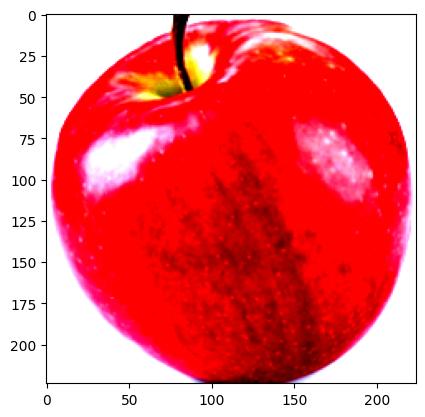

In [ ]:
import matplotlib.pyplot as plt
transformed_image = original_transforms(pil_image)
plt.imshow(transformed_image.permute(1, 2, 0))

In [ ]:
# this specifying batch size = 1
transformed_image.unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [ ]:
with torch.inference_mode():
  logits_with_transform = my_resnet(transformed_image.unsqueeze(0))
  probs_with_transform = torch.softmax(logits_with_transform, dim=1)
  probs, idxs = probs_with_transform.topk(3)



In [ ]:
[(label_mapping[str(idx.item())], prob) for idx, prob in zip(idxs[0], probs[0])]

[('Granny Smith', tensor(0.9544)),
 ('fig', tensor(0.0210)),
 ('bell pepper', tensor(0.0054))]

In [ ]:
label_mapping[str(torch.argmax(logits_with_transform).item())]

'Granny Smith'

In [ ]:
my_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
vgg19 = vgg19(weights=VGG19_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:04<00:00, 117MB/s]


In [ ]:
VGG19_Weights.IMAGENET1K_V1.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
vgg19

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd